In [1]:
## Importing ALl Important Libraries that are required for Data Analysis and Preprocessing

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings(action = 'ignore' , message = 'Call Shukla ji')
%matplotlib inline

In [2]:
## this line of Code is written to escape from the error of finding WCSS

!pip install --upgrade threadpoolctl

Defaulting to user installation because normal site-packages is not writeable


In [3]:
## Loading the Dataset

df = pd.read_csv(r"C:\Users\hs081\Downloads\Mall_Customers.csv")

In [4]:
## Checking top 5 rows from the dataset

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Model Traning Steps 

(1) Dropping Not Important Features 

(2) Traning model by using K-means Clustering Algo

(3) Making Clusters (dependent Variable) 

(4) Elbow Method to Find the Optimal No of Clusters

(5) Visualizing the Elbow Curve 

(6) Again Traning of Model by using Optimal Cluster

(7) Visualizing the Cluster

(8) Finally making a Pickle file and dump all the data into that file 

In [5]:
## Selecting Important Features 

X = df[["Annual Income (k$)","Spending Score (1-100)"]]

In [6]:
# k-means Alogrithm 

from sklearn.cluster import KMeans

## Instance of KMeans algo

kmeans = KMeans()

## Only Traning of Model using k-means 

kmeans.fit(X)

KMeans()

In [7]:
## Making Clusters (dependent variable )

kmeans.fit_predict(X)

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 5, 0, 5, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6])

In [8]:
# Elbow Method to Find the Optimal No of Clusters (WCSS)
# WCSS -> within SOme of Square

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30241.343617936593,
 25022.48500453035,
 21826.936303231654,
 19669.71099830122]

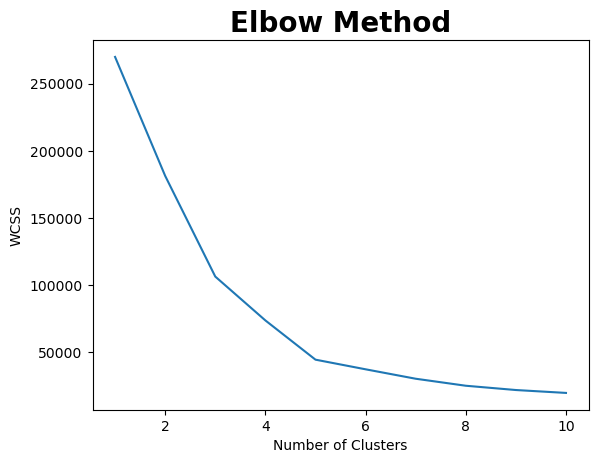

In [10]:
## Visualize the WSCC and finding the optimal Cluster using visualization 

plt.plot(range(1,11) , wcss)
plt.title("Elbow Method" , fontsize = 20 , weight = 'bold')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
## Now Again Model Traning using Optimal no of Clusters

k_means = KMeans(n_clusters=5 , random_state=42)
y_means = k_means.fit_predict(X)

In [12]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

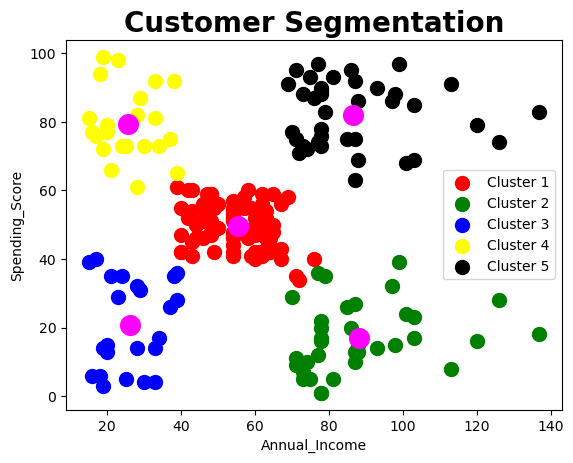

In [13]:
## Visualizing the Clusters
plt.scatter(X.iloc[y_means==0,0], X.iloc[y_means==0,1] , s = 100 , c = 'red' , label = 'Cluster 1')
plt.scatter(X.iloc[y_means==1,0], X.iloc[y_means==1,1] , s = 100 , c = 'green' , label = 'Cluster 2')
plt.scatter(X.iloc[y_means==2,0], X.iloc[y_means==2,1] , s = 100 , c = 'blue' , label = 'Cluster 3')
plt.scatter(X.iloc[y_means==3,0], X.iloc[y_means==3,1] , s = 100 , c = 'yellow' , label = 'Cluster 4')
plt.scatter(X.iloc[y_means==4,0], X.iloc[y_means==4,1] , s = 100 , c = 'black' , label = 'Cluster 5')
plt.scatter(k_means.cluster_centers_[:,0] , k_means.cluster_centers_[:,1] , s= 200 , c = 'magenta')
plt.title("Customer Segmentation" , fontsize= 20 , weight = 'bold')
plt.xlabel("Annual_Income")
plt.ylabel("Spending_Score")
plt.legend()

In [14]:
## Lets Do Prediction 

k_means.predict([[15,39]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [17]:
## Save the Model 

import pickle

In [18]:
pickle.dump(k_means , open("models/Customer_Segmentation_pred" , 'wb'))

In [19]:
## Loading our Model 

model = pickle.load(open("models/Customer_segmentation_pred" , 'rb'))

In [20]:
model.predict([[20,60]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])